In [2]:
%%HTML
<style>
    body {
        --vscode-font-family: "KoddiUD 온고딕"
    }
</style>

In [3]:
# 개발환경 세팅
import os
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import koreanize_matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cluster import KMeans


import warnings
# 모든 경고 무시
warnings.filterwarnings('ignore')

## **📋 데이터 준비하기**
---

> **데이터 준비하기**

- 데이터 출처: [Kaggle-Credit Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data)

- 데이터 명세

| No. | 표준항목명             | 영문명                     | 설명                                                                           | 표현형식/단위  | 예시          |
|-----|------------------|---------------------|-----------------------------------------------------------------------------|-------------|-------------|
| 1   | 고객 ID             | CUST_ID               | 고객을 식별하기 위한 고유 ID                                                           | -           | C10001      |
| 2   | 잔액                | BALANCE               | 신용카드 계좌의 현재 잔액                                                               | N           | 40.9        |
| 3   | 잔액 업데이트 빈도     | BALANCE_FREQUENCY     | 잔액이 업데이트 되는 빈도                                                             | N           | 0.818       |
| 4   | 총 구매액            | PURCHASES             | 신용카드로 이루어진 총 구매액                                                          | N           | 95.4        |
| 5   | 일회성 구매액         | ONEOFF_PURCHASES      | 일회성으로 이루어진 구매액                                                             | N           | 0.0         |
| 6   | 할부 구매액           | INSTALLMENTS_PURCHASES | 할부로 이루어진 구매액                                                               | N           | 95.4        |
| 7   | 현금 서비스 금액       | CASH_ADVANCE          | 현금 서비스로 인출한 금액                                                              | N           | 0.0         |
| 8   | 구매 빈도             | PURCHASES_FREQUENCY    | 구매가 이루어진 빈도                                                                 | N           | 0.167       |
| 9   | 일회성 구매 빈도       | ONEOFF_PURCHASES_FREQUENCY | 일회성 구매가 이루어진 빈도                                                           | N           | 0.0         |
| 10  | 할부 구매 빈도         | PURCHASES_INSTALLMENTS_FREQUENCY | 할부 구매가 이루어진 빈도                                                         | N           | 0.083       |
| 11  | 현금 서비스 빈도       | CASH_ADVANCE_FREQUENCY  | 현금 서비스가 이루어진 빈도                                                           | N           | 0.0         |
| 12  | 현금 서비스 거래 횟수   | CASH_ADVANCE_TRX       | 현금 서비스 거래의 횟수                                                             | N           | 0           |
| 13  | 구매 횟수             | PURCHASES_TRX         | 총 구매 거래의 횟수                                                                | N           | 2           |
| 14  | 신용 한도             | CREDIT_LIMIT          | 신용카드의 신용 한도                                                                | N           | 1000.0      |
| 15  | 지불액               | PAYMENTS              | 신용카드 계좌에 지불한 총 금액                                                        | N           | 201.8       |
| 16  | 최소 지불액           | MINIMUM_PAYMENTS      | 신용카드 계좌의 최소 지불액                                                           | N           | 139.5       |
| 17  | 전액 지불 비율        | PRC_FULL_PAYMENT      | 신용카드 결제 금액 중 전액을 지불한 비율                                                  | N           | 0.0         |
| 18  | 카드 소지 기간         | TENURE                | 신용카드 계좌를 소지한 기간 (월)                                                       | N           | 12          |



In [4]:
# 데이터 불러오기
df = pd.read_csv("./CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## **📊 데이터 파악 및 EDA**

### **데이터셋 기본 정보 확인하기**
- 데이터프레임의 기본 정보를 확인하고, 각 변수의 데이터 타입과 결측치 유무를 파악하세요.

In [5]:
# 데이터프레임의 기본 정보 확인
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


- 데이터프레임의 총 행 수와 열 수, 각 변수의 데이터 타입 및 결측치 여부를 확인할 수 있습니다.
- MINIMUM_PAYMENTS와 CREDIT_LIMIT 변수에 결측치가 있습니다.

### **기술 통계량 계산하기**
각 변수의 기술 통계량을 계산하여 평균, 표준편차, 최소값, 최대값 등을 파악하세요.

In [6]:
# 각 변수의 기술 통계량 계산
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**해석**
- 잔액(BALANCE)
  - 평균 잔액은 1564이지만, 표준편차가 2081이므로 고객별로 잔액의 변동성이 큰 것을 알 수 있음
  - 즉, 고객 중 일부가 상당히 큰 잔액을 가지고 있음
- 잔액 업데이트 빈도(BALANCE_FREQUENCY)
  - 대다수 고객이 1에 가까운 값을 가지므로 잔액이 자주 업데이트됨.
- 일회성 구매
  - 평균이 592로 총 구매액의 절반 이상이 일회성 구매임을 알 수 있음
- 할부 구매(INSTALLMENTS_PURCHASES)
  - 평균이 411로 일회성 구매(ONEOFF_PURCHASE)보다 상대적으로 구매액이 적음을 알 수 있음

### **중복값 확인하기**
- 데이터프레임에서 중복값이 있는 지 확인해보세요. 있다면 중복값을 제거하세요.  

In [7]:
df[df.duplicated()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


- 신용 카드 데이터에 중복이 존재하지 않음을 확인할 수 있음

### **결측치 파악하기**
- 데이터프레임에서 결측치가 존재하는 부분을 시각화해보세요.

<Figure size 1500x600 with 0 Axes>

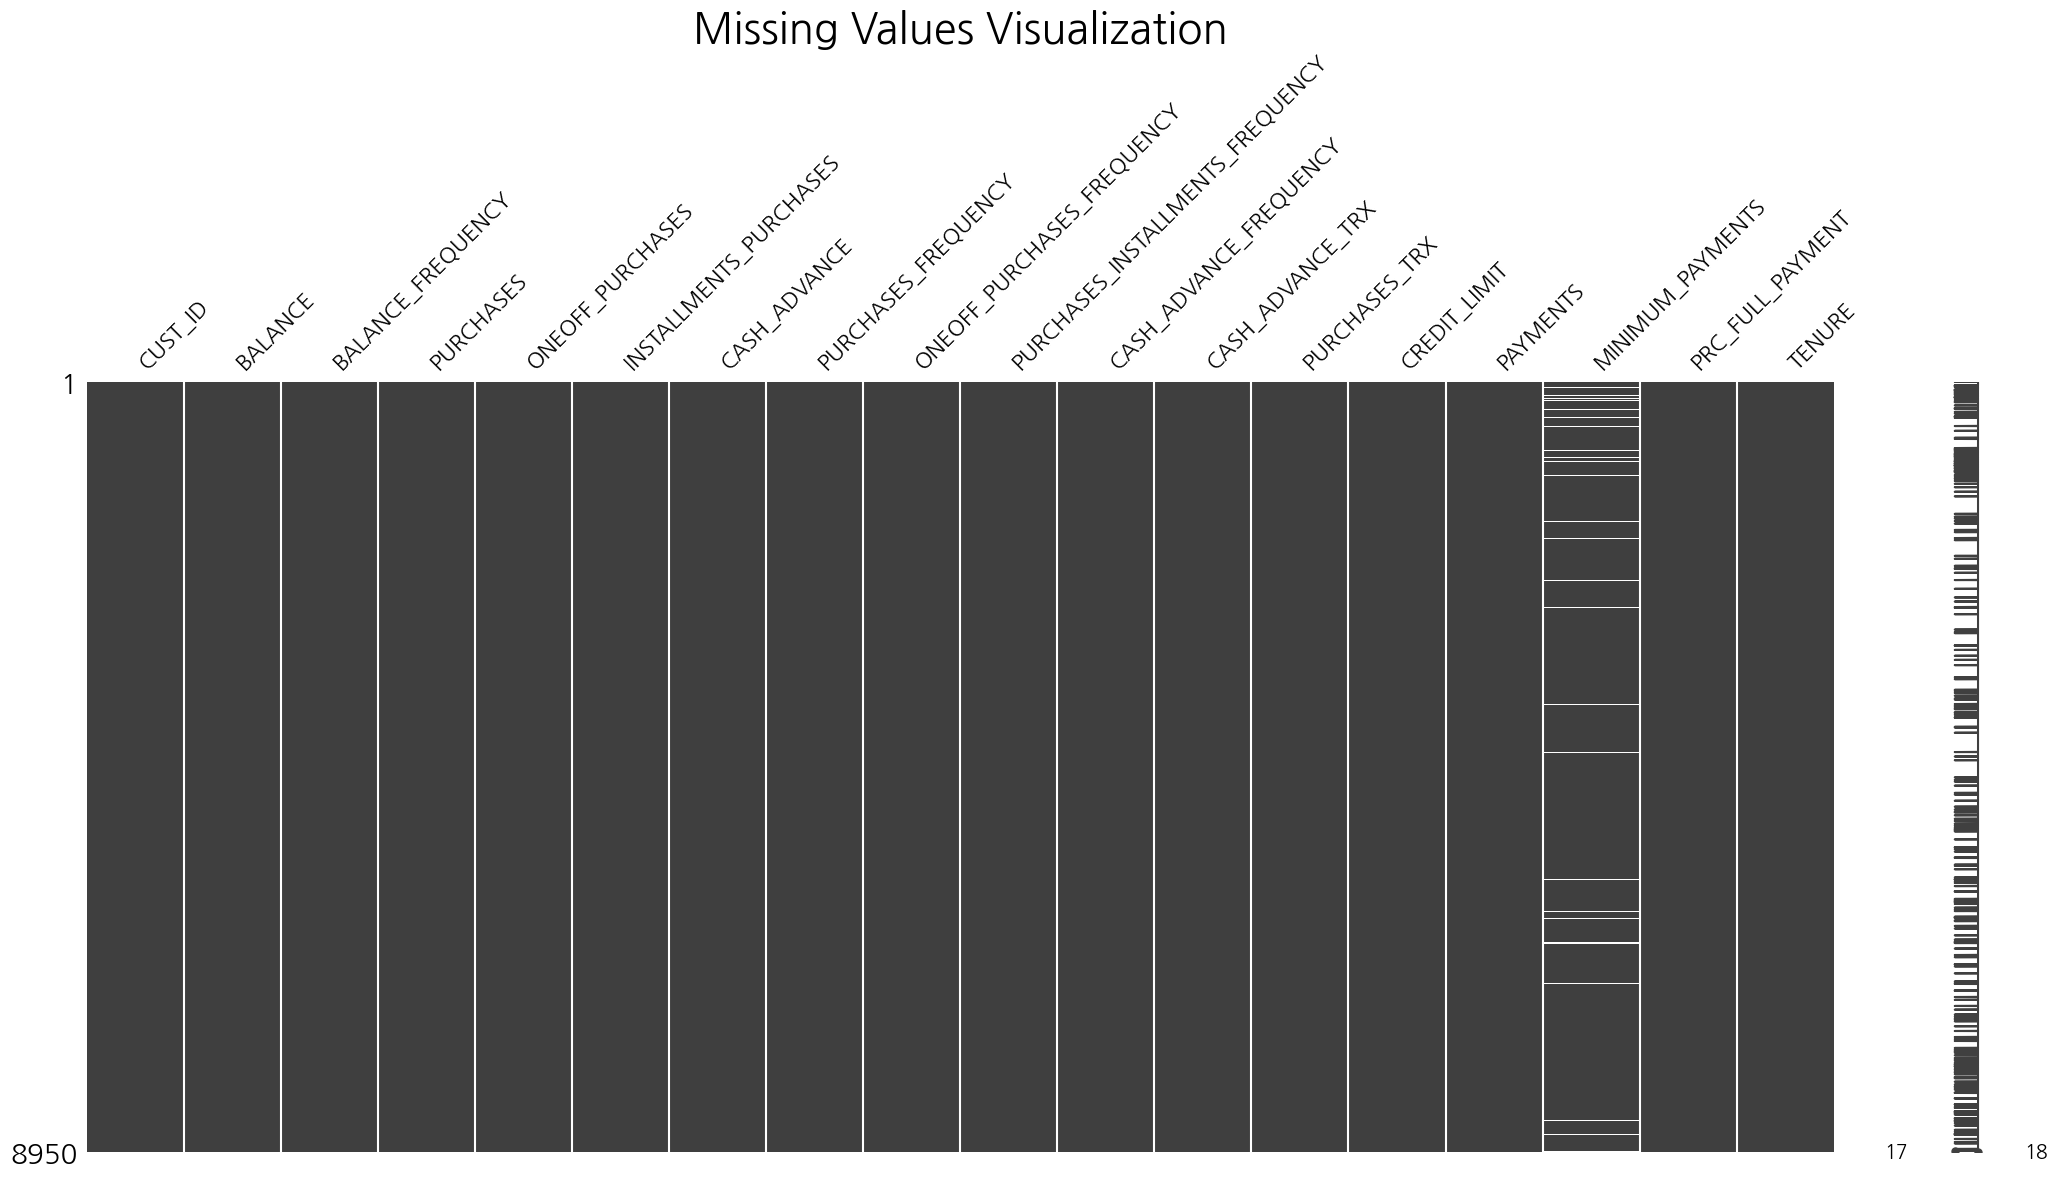

In [8]:
plt.figure(figsize=(15, 6))
msno.matrix(df)
plt.title("Missing Values Visualization", fontsize=30)
plt.show()

- minimum_payments 컬럼에 결측치가 많은 걸 확인할 수 있음

### **데이터 분포 시각화하기 - 히스토그램**
각 변수의 데이터 분포를 히스토그램으로 시각화

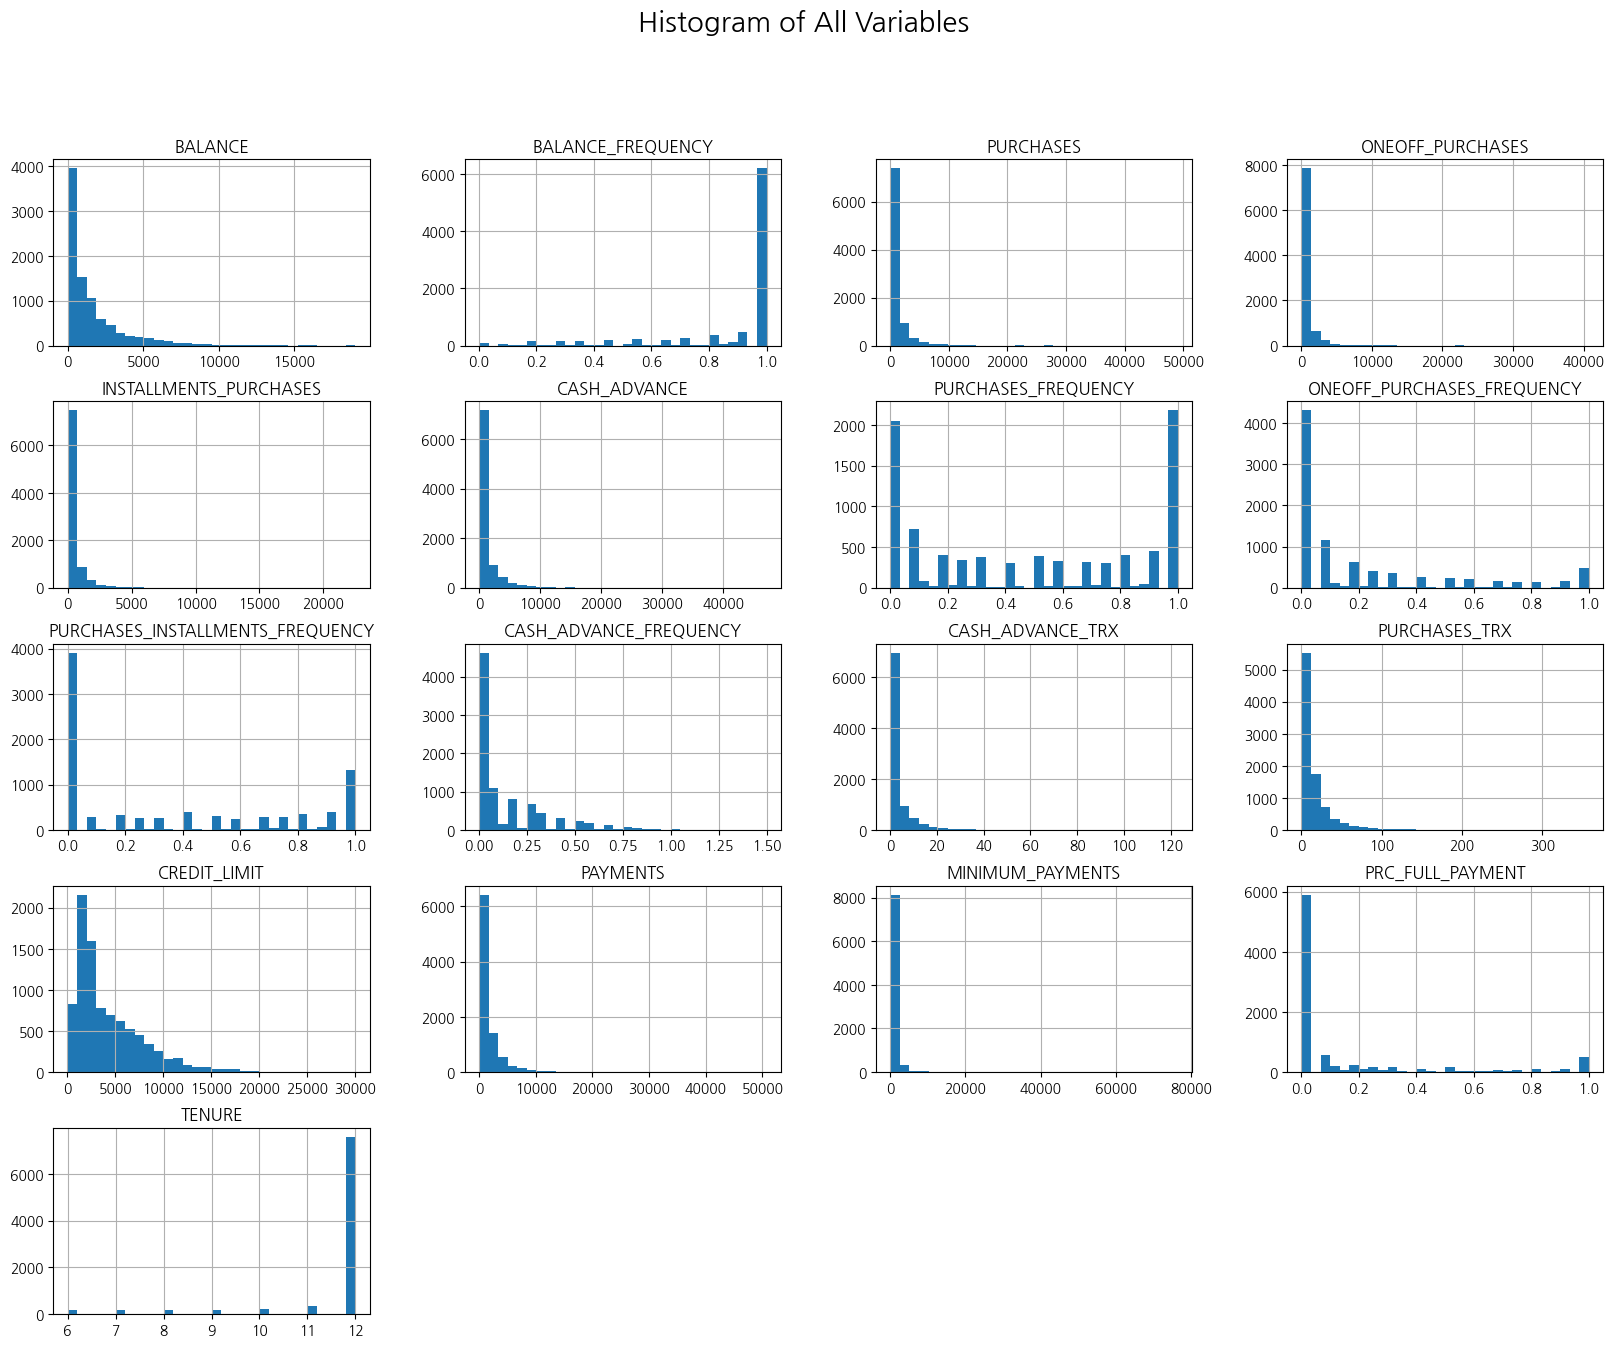

In [9]:
# 히스토그램 시각화
df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histogram of All Variables", fontsize=20)
plt.show()

**시각화 결과 해석**
- 대부분의 변수들이 비대칭적인 분포를 가지고 있고, 분포가 오른쪽으로 치우쳐 있는 변수들이 많은 것으로 보아 일부 고객들이 매우 큰 값을 가지고 있는 것을 알 수 있음
- balance_frequency(잔액 업데이트 빈도), purchases_frequency(구매 빈도), tenure(카드 소지기간)를 제외한 다른 모든 변수들에 대한 히스토그램에서 나타난 변수들의 값이 모두 0쪽에 쏠려 있었음

### **데이터의 이상치 파악하기**
- 각 변수의 분포 박스플롯 시각화

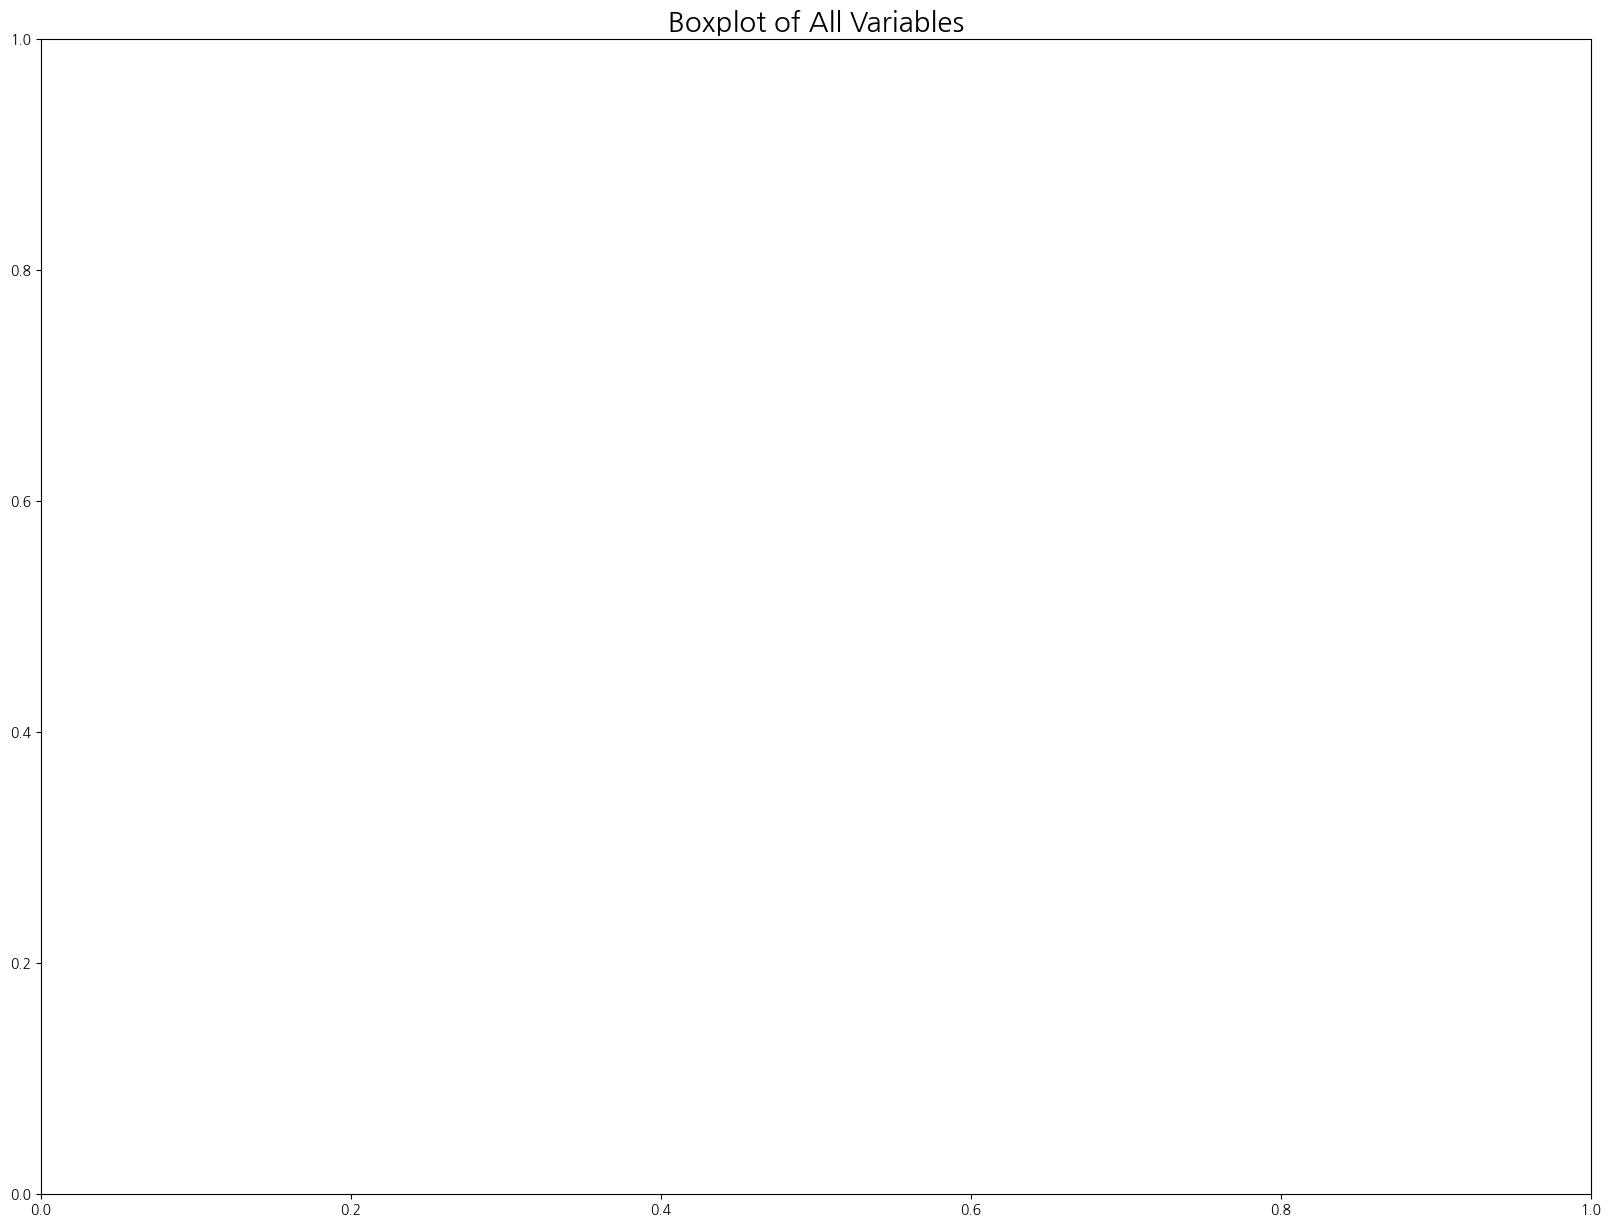

In [10]:
# 상자 그림 시각화
plt.figure(figsize=(20,15))
sns.boxplot(df=df, orient = 'h')
plt.title('Boxplot of All Variables', fontsize=20)
plt.show()

## **⚒️ 데이터 전처리**

### **결측치 처리하기**
-  변수의 결측치 수를 확인하고, 결측치가 존재하는 변수들을 적절한 방법으로 전처리

- CREDIT_LIMIT 변수에는 결측치 1개
- MINIMUM_PAYMENTS 변수에는 결측치 313개

In [11]:
# 결측치가 있다면 평균값이 치우쳐질 수도 있기에 중앙값으로 대체
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

### **이상치 처리하기**

- 데이터에 이상치가 있는지 확인해보세요. 확인 후, 전처리가 필요하다면 진행해주세요.

Text(0.5, 1.0, 'Boxplot of PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES')

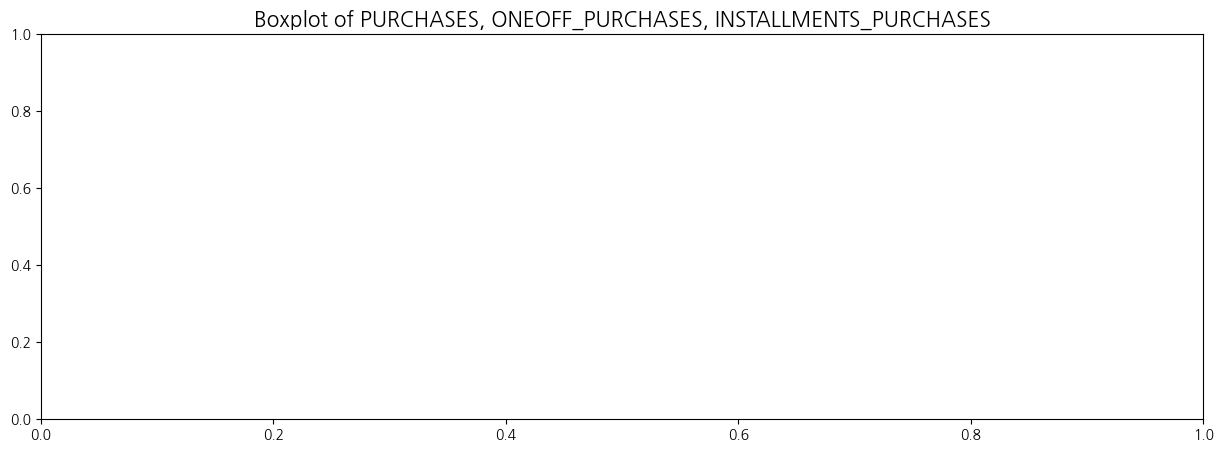

In [12]:
# 이상치 제거 전 시각화
plt.figure(figsize=(15, 5))
sns.boxplot(df=df[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']])
plt.title("Boxplot of PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES", fontsize=15)

In [13]:
# 이상치 제거 (전처리 진행) - IQR 방법으로 이상치 제거
def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  return df[(df[column] >= lower_limit)&(df[column]<=upper_limit)]

In [14]:
# PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES 변수의 이상치 제거
df = remove_outliers(df, 'PURCHASES')
df = remove_outliers(df, 'ONEOFF_PURCHASES')
df = remove_outliers(df, 'INSTALLMENTS_PURCHASES')

In [15]:
# 이상치 제거 확인
df.shape

(6590, 18)

Text(0.5, 1.0, 'Boxplot of PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES')

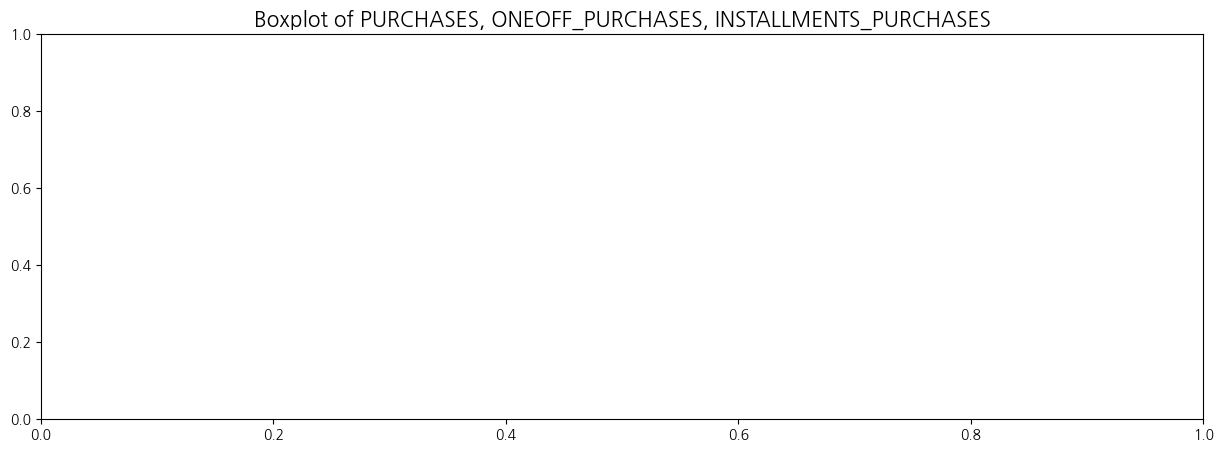

In [16]:
# 이상치 제거 전 시각화
plt.figure(figsize=(15, 5))
sns.boxplot(df=df[['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']])
plt.title("Boxplot of PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES", fontsize=15)

- 박스플롯에서 이상치를 발견해서 이상치 제거 방법으로 이상치를 제거했는데 다시 이상치가 발생하는 경우
  
  - **데이터의 변동성**
    - 원래 데이터의 분포가 매우 넓거나 변동성이 클 경우 이상치가 계속해서 발생할 수 있음
  - **제거 기준의 설정**
    - 이상치를 정의하는 기준이 너무 엄격하거나 느슨하게 설정된 경우
   

### **데이터 스케일링하기**
- 각 변수의 데이터를 표준화 혹은 정규화

- **표준화**(StandardScaler)
  - 데이터의 평균을 0, 표준편차를 1로 맞추어 변환
  - (데이터 - 데이터의 평균) / 데이터의 표준편차
- **정규화**(MinMaxScaler)
  - 데이터 값을 0과 1 사이로 변환
  - (데이터 - 데이터의 최소값) / (데이터의 최대값 - 데이터의 최소값)
  
- 표준화와 정규화는 모델 학습의 성능을 향상시킬 수 있음

In [17]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.2,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12


In [18]:
# 'CUST_ID' 열 제외
df_numeric = df.drop('CUST_ID', axis=1)

In [19]:
# 표준화 (StandardScaler)
scaler1 = StandardScaler()
df_standardized = scaler1.fit_transform(df_numeric)
df_standardized = pd.DataFrame(df_standardized)

In [20]:
# 정규화 (MinMaxScaler)
scaler2 = MinMaxScaler()
df_normalized = scaler2.fit_transform(df_numeric)
df_normalized = pd.DataFrame(df_normalized)

In [21]:
df_standardized.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,6.590000e+03,6.590000e+03,6.590000e+03,6.590000e+03,6.590000e+03,6.590000e+03,6.590000e+03,6.590000e+03,6.590000e+03,6.590000e+03,6.590000e+03,6.590000e+03,6.590000e+03,6590.000000,6.590000e+03,6.590000e+03,6.590000e+03
mean,1.207599e-16,6.037996e-17,-1.121342e-16,4.312854e-17,4.312854e-17,6.037996e-17,2.027041e-16,-1.725142e-17,-8.625708e-18,1.035085e-16,-1.078214e-17,-3.234641e-18,1.035085e-16,0.000000,-2.587713e-17,-4.744140e-17,-7.763138e-17
std,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076,1.000076e+00,1.000076e+00,1.000076e+00
min,-7.447969e-01,-3.322054e+00,-8.780804e-01,-5.772437e-01,-6.880662e-01,-5.122306e-01,-9.893122e-01,-5.195203e-01,-7.688672e-01,-7.378621e-01,-5.049377e-01,-7.705013e-01,-1.199083e+00,-0.583795,-3.800761e-01,-4.698226e-01,-3.792841e+00
25%,-7.079527e-01,-1.400489e-01,-8.780804e-01,-5.772437e-01,-6.880662e-01,-5.122306e-01,-9.893122e-01,-5.195203e-01,-7.688672e-01,-7.378621e-01,-5.049377e-01,-7.705013e-01,-7.446503e-01,-0.435902,-2.979474e-01,-4.698226e-01,3.909763e-01
50%,-3.067138e-01,5.670625e-01,-3.405975e-01,-5.772437e-01,-6.880662e-01,-4.648686e-01,-3.289112e-01,-5.195203e-01,-7.688672e-01,-3.338850e-01,-3.655760e-01,-4.159035e-01,-2.745473e-01,-0.293070,-2.243212e-01,-4.698226e-01,3.909763e-01
75%,2.246650e-01,5.670625e-01,5.703174e-01,1.952433e-01,4.751274e-01,1.290731e-01,9.918906e-01,-2.978235e-02,7.611613e-01,4.740740e-01,1.918708e-01,5.296905e-01,5.089577e-01,0.036995,-1.779087e-02,-1.182431e-01,3.909763e-01
max,7.623170e+00,5.670625e-01,4.496748e+00,3.507929e+00,3.342782e+00,2.206509e+01,1.652292e+00,4.377859e+00,1.985182e+00,6.533755e+00,1.663655e+01,8.449041e+00,5.993493e+00,18.220217,3.005609e+01,3.397556e+00,3.909763e-01


- 표준화 잘 됨
  - 평균이 0에 가깝고 분산이 1에 가까움

In [22]:
df_normalized.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000
mean,0.089006,0.854192,0.163369,0.141302,0.170700,0.022688,0.374512,0.106081,0.279177,0.101472,0.029457,0.083573,0.166711,0.031046,0.012488,0.121483,0.906550
std,0.119512,0.257147,0.186067,0.244806,0.248106,0.044296,0.378587,0.204206,0.363129,0.137531,0.058342,0.108473,0.139043,0.053184,0.032858,0.258593,0.239034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004403,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063181,0.007865,0.002698,0.000000,1.000000
50%,0.052352,1.000000,0.100000,0.000000,0.000000,0.002098,0.250000,0.000000,0.000000,0.055555,0.008130,0.038462,0.128540,0.015461,0.005117,0.000000,1.000000
75%,0.115854,1.000000,0.269478,0.189095,0.288573,0.028405,0.750000,0.100000,0.555556,0.166667,0.040650,0.141026,0.237473,0.033014,0.011903,0.090909,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- 정규화 잘 됨
  - 최대 최소값이 1과 0

-> **이후 분석은 표준화된 데이터를 바탕으로 진행**

In [23]:
df_numeric.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [24]:
df_standardized.columns = df_numeric.columns

In [25]:
X = df_standardized
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.723559,-0.140049,-0.576458,-0.577244,-0.251225,-0.512231,-0.549044,-0.519520,-0.539364,-0.737862,-0.504938,-0.534103,-0.901351,-0.486617,-0.310513,-0.469823,0.390976
1,0.918073,0.213507,-0.878080,-0.577244,-0.688066,2.573748,-0.989312,-0.519520,-0.768867,0.474074,0.052509,-0.770501,0.979061,1.392037,0.154685,0.389594,0.390976
2,0.550800,0.567062,1.566423,2.915936,-0.688066,-0.512231,1.652292,4.377859,-0.768867,-0.737862,-0.504938,0.647890,1.135762,-0.284237,-0.067262,-0.469823,0.390976
3,-0.320202,0.567062,-0.827494,-0.504956,-0.688066,-0.512231,-0.769179,-0.111407,-0.768867,-0.737862,-0.504938,-0.652302,-0.838671,-0.257141,-0.258009,-0.469823,0.390976
4,0.202128,0.567062,0.501037,-0.577244,1.309316,-0.512231,1.652292,-0.519520,1.985182,-0.737862,-0.504938,0.647890,-0.493929,-0.256789,-0.114763,-0.469823,0.390976


## **👥 클러스터 분석** 

### **K-means 클러스터링 모델 학습**
- K-means 알고리즘을 사용하여 클러스터링 모델을 학습
  - 클러스터의 수는 3로 설정

In [58]:
model = KMeans(n_clusters=3, random_state=123)

In [59]:
model.fit(X)

KMeans(n_clusters=3, random_state=123)

In [60]:
# 클러스터 레이블 예측
X['Label'] = model.predict(X)
# 각 군집의 중심점 (centroid)
centers = model.cluster_centers_

### **클러스터링 결과 시각화 (2D)**
- 두 개의 주요 변수(BALANCE, PURCHASES)를 사용하여 클러스터링 결과를 2D로 시각화

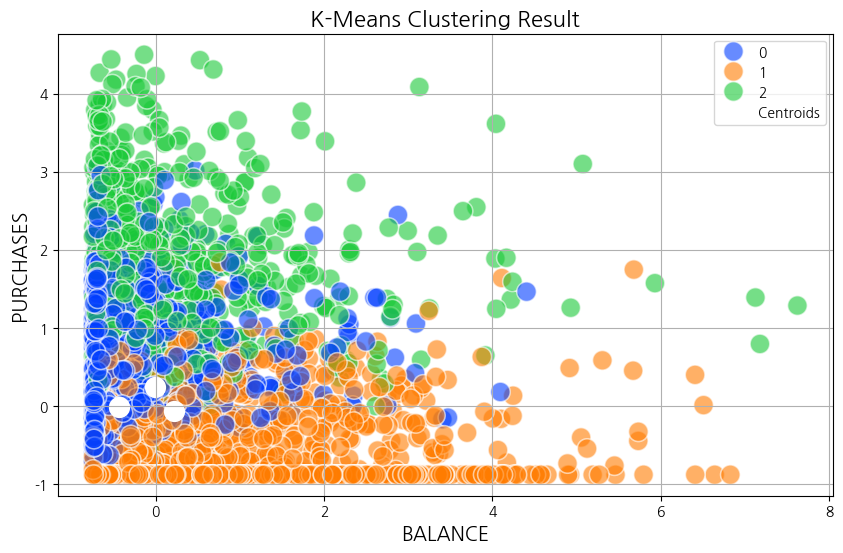

In [61]:
# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['BALANCE'], y=X['PURCHASES'], hue=X['Label'], s=200, palette='bright', alpha=0.6)
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='white', s=200, label='Centroids')
plt.title("K-Means Clustering Result", fontsize=16)
plt.xlabel("BALANCE", fontsize=14)
plt.ylabel("PURCHASES", fontsize=14)
plt.legend()
plt.grid()
plt.show()

### **클러스터 수 결정 (Elbow Method)**
- Elbow Method를 사용하여 최적의 클러스터 수를 결정하세요.

In [62]:
model.inertia_

79435.02011844433

In [63]:
# X에 추가했던 Label열 제거
X = X.drop(['Label'], axis = 1)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.723559,-0.140049,-0.576458,-0.577244,-0.251225,-0.512231,-0.549044,-0.519520,-0.539364,-0.737862,-0.504938,-0.534103,-0.901351,-0.486617,-0.310513,-0.469823,0.390976
1,0.918073,0.213507,-0.878080,-0.577244,-0.688066,2.573748,-0.989312,-0.519520,-0.768867,0.474074,0.052509,-0.770501,0.979061,1.392037,0.154685,0.389594,0.390976
2,0.550800,0.567062,1.566423,2.915936,-0.688066,-0.512231,1.652292,4.377859,-0.768867,-0.737862,-0.504938,0.647890,1.135762,-0.284237,-0.067262,-0.469823,0.390976
3,-0.320202,0.567062,-0.827494,-0.504956,-0.688066,-0.512231,-0.769179,-0.111407,-0.768867,-0.737862,-0.504938,-0.652302,-0.838671,-0.257141,-0.258009,-0.469823,0.390976
4,0.202128,0.567062,0.501037,-0.577244,1.309316,-0.512231,1.652292,-0.519520,1.985182,-0.737862,-0.504938,0.647890,-0.493929,-0.256789,-0.114763,-0.469823,0.390976


In [65]:
# inertia 값을 저장할 리스트
inertias = []

for k in range(1, 16):  # k값의 범위를 1~15로 지정
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(X)
    inertias.append(model.inertia_)

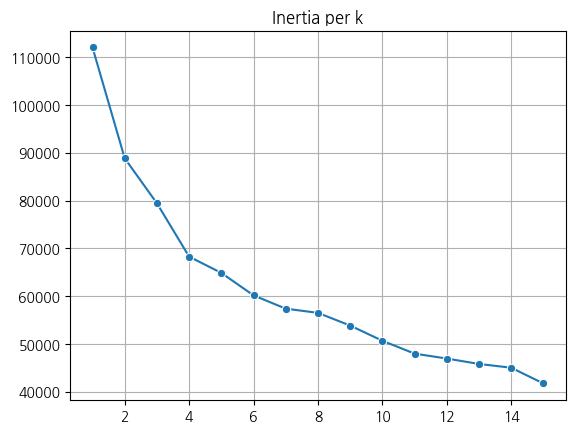

In [68]:
# k값에 따른 inertia값 시각화
sns.lineplot(x=range(1, 16), y=inertias, marker='o')
plt.title("Inertia per k")
plt.grid()

### **결과 해석**

- 클러스터의 수를 5로 진행하고, 2가지 변수(BALANCE, PURCHASES)로 시각화
- 결과보고 추가 분석을 진행

In [69]:
model = KMeans(n_clusters=5, random_state=123)
model.fit(X)

KMeans(n_clusters=5, random_state=123)

In [70]:
df['Label'] = model.predict(X)

In [71]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Label
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1
7,C10008,1823.652743,1.000000,436.20,0.00,436.2,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12,3


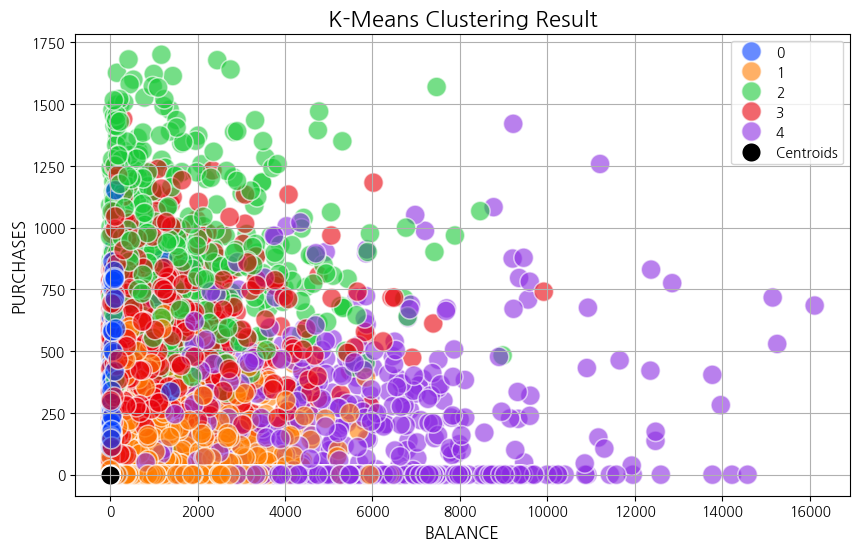

In [84]:
# 시각화
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['BALANCE'], y=df['PURCHASES'], hue=df['Label'], alpha=0.6, s=200, palette='bright')
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='black', s=200, label='Centroids')
plt.title("K-Means Clustering Result", fontsize=16)
plt.xlabel("BALANCE", fontsize=12)
plt.ylabel("PURCHASES", fontsize=12)
plt.legend()
plt.grid()
plt.show()

- centroid 점이 모두 0,0에 위치

### **계층적 클러스터링 모델 학습 및 덴드로그램 시각화**
- 계층적 클러스터링을 scipy를 사용하여 모델을 학습하고, 덴드로그램을 시각화

### **DBSCAN 클러스터링 모델 학습**
- DBSCAN 알고리즘을 사용하여 클러스터링 모델을 학습

### 문제16: DBSCAN 클러스터링 모델 학습 (매개변수 조정)
- DBSCAN의 eps와 min_samples 값을 조정하여, 클러스터링 결과가 개선되도록 하세요.

In [29]:
# DBSCAN 모델 학습 (매개변수 조정)


### 문제17: 클러스터링 결과 시각화 및 노이즈 탐지
- DBSCAN 결과를 시각화하고, 노이즈 데이터를 탐지하세요.

In [30]:
# DBSCAN 결과 시각화 (최적 매개변수 사용 후)


In [31]:
# 노이즈 데이터 개수 확인



### 문제18: GMM 클러스터링 모델 학습
- Gaussian Mixture Model을 사용하여 클러스터링 모델을 학습하고, 결과를 얻으세요. 클러스터의 수는 3으로 설정하세요.

### 문제19: 클러스터링 결과 시각화 및 클러스터 확률 해석
- GMM 결과를 시각화하고, 각 데이터 포인트의 클러스터 소속 확률을 확인하세요.

### 문제20: 클러스터링 결과 해석 및 비교
- K-means, 계층적 클러스터링, DBSCAN, GMM의 클러스터링 결과를 비교해보세요.
- 각 방법의 장단점, 특징도 고려해서 결과 분석을 진행해보세요.

## PCA (3문제)


### 문제21: PCA의 주성분 계산 및 시각화
- 주성분 분석(PCA)을 사용하여 주성분을 계산하고, 첫 두 주성분을 시각화하세요.

In [32]:
from sklearn.decomposition import PCA


### 문제22: 적절한 주성분 수 결정
- 적절한 주성분 수를 결정하기 위해, 주성분의 설명력(분산 설명 비율)을 시각화하세요.

### 문제23: 차원 축소를 활용한 데이터 시각화
- 적절한 주성분 수를 선택한 후, 이를 사용하여 데이터를 저차원으로 변환하세요.
- 시각화가 가능하다면, 데이터 시각화를 진행해주세요.

## PCA를 활용한 클러스터링 (6문제)


CUST_ID를 제외하면 분석 중인 데이터에 총 17개의 열이 있습니다. 차원이 너무 많아서 데이터의 분포나 특징을 시각화로 파악하는 것이 어렵네요. 관련하여, PCA를 통해 모든 차원의 특징을 최대한 살리면서, 동시에 데이터의 특징을 한눈에 파악할 수 있도록 2차원으로 차원을 축소해 봅시다.

### 문제24: PCA를 활용한 차원 축소 후 K-means 클러스터링
- PCA를 통해 차원 축소한 데이터를 사용하여 K-means 클러스터링을 수행하고 결과를 분석해보세요.
-  최적의 군집 개수를 Elbow plot를 통해 확인해보세요.


### 문제25 : K-means 결과 해석하기
- 위 클러스터링 결과를 시각화해보세요.
- K-means의 결과를 해석해봅시다.

  - 각 클러스터별로 고객들은 어떤 특징을 가지나요?
  - 위 분석을 토대로 대출 서비스를 제안한다면, 어떤 전략이 좋을까요?

### 문제26 : PCA를 활용한 차원 축소 후 계층적 클러스터링
- PCA를 통해 차원 축소한 데이터를 사용하여 계층적 클러스터링을 수행하고 덴드로그램을 시각화하세요.

### 문제27 : PCA를 활용한 차원 축소 후 DBSCAN 클러스터링
- PCA를 통해 차원 축소한 데이터를 사용하여 DBSCAN 클러스터링을 수행하고 결과를 시각화하세요.

### 문제28 : PCA를 활용한 차원 축소 후 GMM 클러스터링
- PCA를 통해 차원 축소한 데이터를 사용하여 GMM 클러스터링을 수행하고 결과를 시각화하세요.

### 문제29 : 원본 데이터와 차원 축소 데이터를 사용한 클러스터링 결과 비교
- 원본 데이터와 차원 축소 데이터를 사용하여 다양한 클러스터링 기법을 적용한 결과를 비교해보세요.

In [33]:
# 위에 분석한 내용을 바탕으로 자유롭게 의견을 작성해주세요.